In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.neighbors import KNeighborsRegressor    # regressor

from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
from sklearn.preprocessing import LabelEncoder

# Assess the accuracy of predictions
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.formula.api as smf # linear modeling
import warnings
warnings.filterwarnings('ignore')

shooting_and_sales_per_pop = pd.read_csv('./data/shootings_and_sales_per_pop.csv')
shooting_and_sales_per_pop.describe()

,year,population,admin,handgun,long_gun,month,multiple,other,permit,totals,...,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
count,3120.00000,3.120000e+03,3120.000000,3.120000e+03,3120.000000,3120.000000,3120.000000,3120.000000,3.120000e+03,3.120000e+03,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,2015.00000,1.234632e+07,16.645833,2.256144e+04,18825.067949,6.500000,770.629167,1150.964744,2.807421e+04,7.511860e+04,...,0.146956,207.343773,197.680802,8.750927,9.630747,247.233412,706.617587,0.009569,0.035213,0.007799
std,1.41444,4.380087e+07,91.761861,8.269515e+04,69769.322501,3.452606,2816.671262,4895.819297,1.097614e+05,2.740300e+05,...,0.674388,128.655670,134.232149,7.969797,8.589058,818.017984,871.717225,0.058632,0.278461,0.020178
min,2013.00000,5.793150e+05,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000e+00,2.300000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480645,0.000000,0.000000,0.000000
25%,2014.00000,1.791128e+06,0.000000,2.858500e+03,3319.500000,3.750000,39.000000,92.750000,7.417500e+02,9.946250e+03,...,0.000000,122.312728,100.330104,0.665113,3.832546,34.871661,394.290145,0.000000,0.000000,0.000000
50%,2015.00000,4.540492e+06,0.000000,7.403500e+03,6889.500000,6.500000,216.000000,260.000000,3.730500e+03,2.410100e+04,...,0.000000,199.663178,169.009441,8.078368,8.303441,103.154570,585.693551,0.000000,0.000000,0.000000
75%,2016.00000,7.619730e+06,1.000000,1.583175e+04,13316.500000,9.250000,568.250000,686.000000,1.454850e+04,4.603300e+04,...,0.015127,283.670948,265.227512,13.270332,13.493063,195.548924,800.671761,0.000000,0.028840,0.009588
max,2017.00000,3.257192e+08,2435.000000,1.201747e+06,873335.000000,12.000000,34059.000000,111710.000000,1.251905e+06,3.308199e+06,...,21.304333,981.372780,817.178667,53.320128,198.310403,8545.843026,9380.854741,1.967953,14.709615,0.307638


In [2]:
shooting_and_sales_per_pop.columns

Index(['year', 'state', 'population', 'admin', 'handgun', 'long_gun', 'month',
       'multiple', 'other', 'permit', 'totals', 'killed', 'killed_max',
       'injured', 'incidents', 'injured_max', 'affected_max',
       'affected_over_10', 'killed_ave', 'injured_ave', 'admin_pop',
       'handgun_pop', 'long_gun_pop', 'multiple_pop', 'other_pop',
       'permit_pop', 'totals_pop', 'killed_pop', 'injured_pop',
       'incidents_pop'],
      dtype='object')

In [3]:
shooting_and_sales_per_pop = shooting_and_sales_per_pop[shooting_and_sales_per_pop.state != 'United States']

In [4]:
shooting_and_sales_per_pop.head()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,...,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
12,2013,Alabama,4827660.0,0.0,20186.0,30523.0,12,926.0,738.0,21065.0,...,0.0,418.132180,632.252478,19.181135,15.286909,436.339759,1602.722644,0.062142,0.10357,0.020714
13,2013,Alabama,4827660.0,0.0,14646.0,22547.0,11,808.0,508.0,15409.0,...,0.0,303.376791,467.037861,16.736887,10.522696,319.181550,1226.536252,0.000000,0.00000,0.000000
14,2013,Alabama,4827660.0,0.0,12230.0,15479.0,10,740.0,461.0,18118.0,...,0.0,253.331842,320.631527,15.328337,9.549140,375.295692,1067.183687,0.000000,0.00000,0.000000
15,2013,Alabama,4827660.0,0.0,11406.0,13077.0,9,616.0,566.0,16722.0,...,0.0,236.263531,270.876574,12.759805,11.724107,346.378991,958.290352,0.000000,0.00000,0.000000
16,2013,Alabama,4827660.0,0.0,14310.0,13402.0,8,688.0,350.0,17470.0,...,0.0,296.416898,277.608614,14.251211,7.249889,361.873040,1035.242747,0.000000,0.00000,0.000000


In [5]:
shooting_and_sales_per_pop.tail()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,...,admin_pop,handgun_pop,long_gun_pop,multiple_pop,other_pop,permit_pop,totals_pop,killed_pop,injured_pop,incidents_pop
3115,2017,Wyoming,579315.0,5.0,1589.0,1578.0,5,91.0,101.0,435.0,...,0.863088,274.289463,272.390668,15.708207,17.434384,75.088682,712.565703,0.0,0.0,0.0
3116,2017,Wyoming,579315.0,8.0,1633.0,1711.0,4,85.0,108.0,382.0,...,1.380941,281.884640,295.348817,14.672501,18.642707,65.939946,736.904793,0.0,0.0,0.0
3117,2017,Wyoming,579315.0,6.0,2017.0,2038.0,3,124.0,134.0,534.0,...,1.035706,348.169821,351.794792,21.404590,23.130767,92.177831,917.462866,0.0,0.0,0.0
3118,2017,Wyoming,579315.0,8.0,1839.0,1646.0,2,113.0,123.0,330.0,...,1.380941,317.443878,284.128669,19.505796,21.231972,56.963828,786.100826,0.0,0.0,0.0
3119,2017,Wyoming,579315.0,0.0,1329.0,1433.0,1,73.0,109.0,449.0,...,0.000000,229.408871,247.361108,12.601089,18.815325,77.505330,639.548432,0.0,0.0,0.0


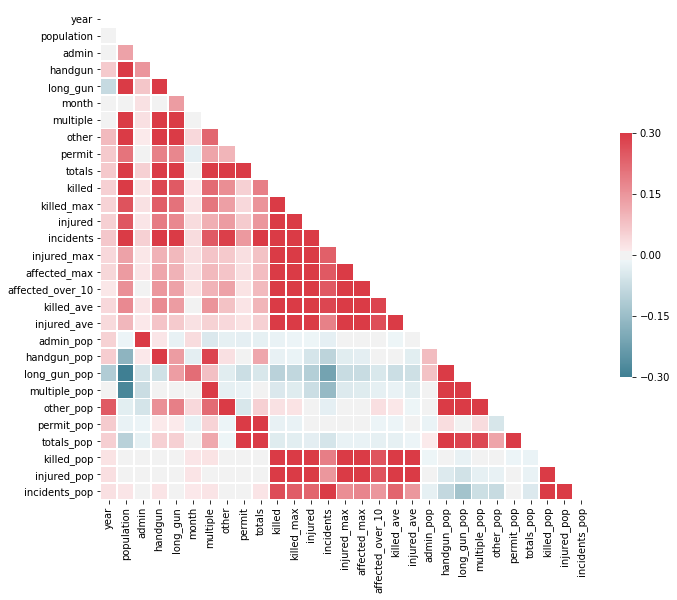

In [6]:
# Select optimal features for your model
corr = shooting_and_sales_per_pop.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Statistical Model 

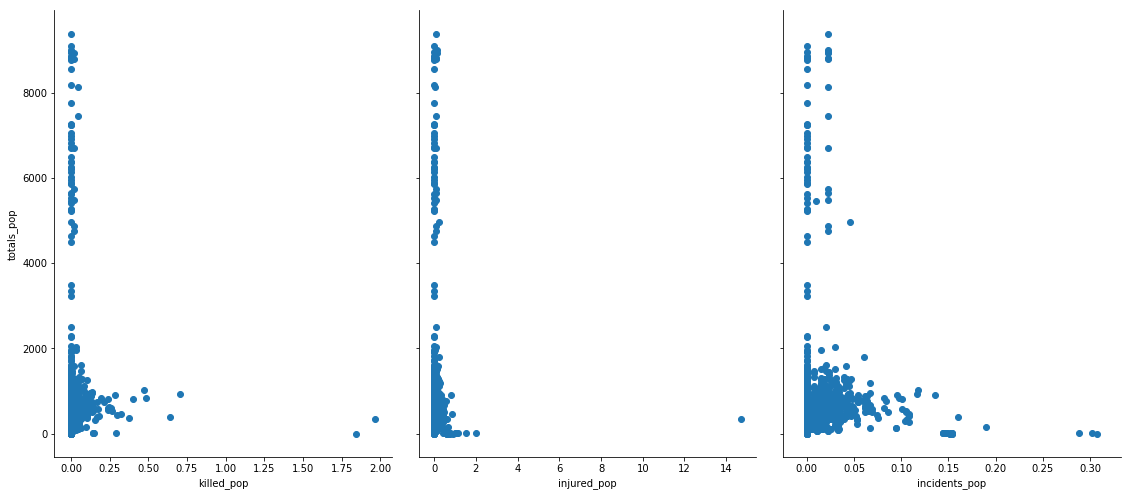

In [39]:
g = sns.PairGrid(shooting_and_sales_per_pop,
                 x_vars=["killed_pop",'injured_pop', 'incidents_pop'],
                 y_vars=["totals_pop"],
                 aspect=.75, size=7)
g.map(plt.scatter)
plt.show()

In [40]:
lm = smf.ols(formula='totals_pop ~ killed_pop', data=shooting_and_sales_per_pop).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totals_pop   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.016
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.313
Time:                        12:52:01   Log-Likelihood:                -25087.
No. Observations:                3060   AIC:                         5.018e+04
Df Residuals:                    3058   BIC:                         5.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    711.1408     16.114     44.133      0.000     679.546     742.736
killed_pop  -270.9171    268.738     -1.008      0.313    -797.842     256.008
==============================================================================
Omnibus:                     3679.347   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333380.510
Skew:                           6.533   Prob(JB):                         0.00
Kurtosis:                      52.437   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
injured_lm = smf.ols(formula='totals_pop ~ injured_pop', data=shooting_and_sales_per_pop).fit()
injured_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totals_pop   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.456
Date:                Wed, 05 Dec 2018   Prob (F-statistic):              0.228
Time:                        12:52:02   Log-Likelihood:                -25087.
No. Observations:                3060   AIC:                         5.018e+04
Df Residuals:                    3058   BIC:                         5.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     710.9524     16.030     44.351      0.000     679.521     742.383
injured_pop   -68.2800     56.581     -1.207      0.228    -179.220      42.660
==============================================================================
Omnibus:                     3681.034   Durbin-Watson:                   0.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           334006.551
Skew:                           6.538   Prob(JB):                         0.00
Kurtosis:                      52.484   Cond. No.                         3.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
incident_lm = smf.ols(formula='totals_pop ~ incidents_pop', data=shooting_and_sales_per_pop).fit()
incident_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totals_pop   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.547
Date:                Wed, 05 Dec 2018   Prob (F-statistic):             0.0186
Time:                        12:52:03   Log-Likelihood:                -25085.
No. Observations:                3060   AIC:                         5.017e+04
Df Residuals:                    3058   BIC:                         5.019e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       722.8662     17.018     42.476      0.000     689.498     756.235
incidents_pop -1837.9445    780.392     -2.355      0.019   -3368.091    -307.798
==============================================================================
Omnibus:                     3686.278   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336298.609
Skew:                           6.553   Prob(JB):                         0.00
Kurtosis:                      52.658   Cond. No.                         49.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
shooting_and_sales_per_pop['simple_pred'] = lm.predict()

In [44]:
shooting_and_sales_per_pop['simple_pred_injured'] = injured_lm.predict()

In [45]:
shooting_and_sales_per_pop['simple_pred_incidents'] = incident_lm.predict()

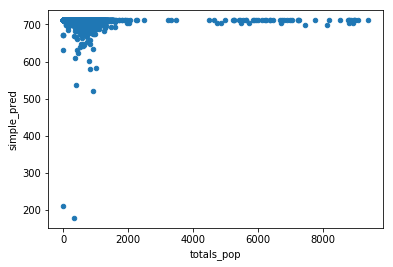

In [46]:
shooting_and_sales_per_pop.plot('totals_pop', 'simple_pred', kind="scatter")

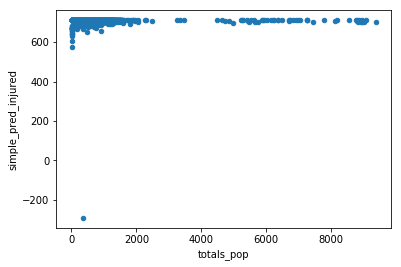

In [47]:
shooting_and_sales_per_pop.plot('totals_pop', 'simple_pred_injured', kind="scatter")

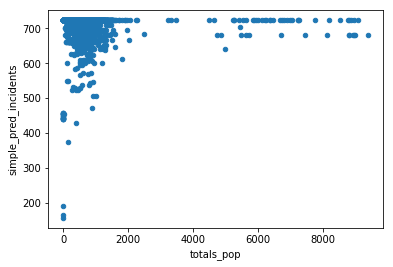

In [48]:
shooting_and_sales_per_pop.plot('totals_pop', 'simple_pred_incidents', kind="scatter")

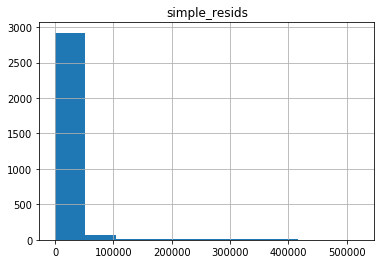

In [49]:
# What is the distrubution of the residuals?
shooting_and_sales_per_pop['simple_resids'] = shooting_and_sales_per_pop.permit - shooting_and_sales_per_pop.simple_pred
shooting_and_sales_per_pop.hist('simple_resids')
plt.show()

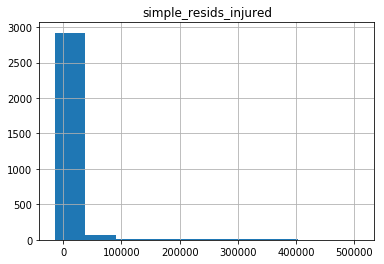

In [18]:
# What is the distrubution of the residuals?
shooting_and_sales_per_pop['simple_resids_injured'] = shooting_and_sales_per_pop.permit - shooting_and_sales_per_pop.simple_pred_injured
shooting_and_sales_per_pop.hist('simple_resids_injured')
plt.show()

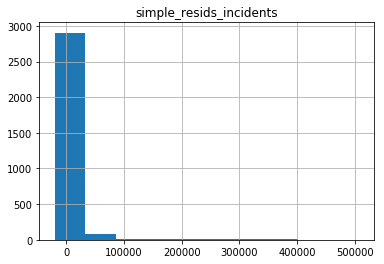

In [19]:
# What is the distrubution of the residuals?
shooting_and_sales_per_pop['simple_resids_incidents'] = shooting_and_sales_per_pop.permit - shooting_and_sales_per_pop.simple_pred_incidents
shooting_and_sales_per_pop.hist('simple_resids_incidents')
plt.show()

In [50]:
full_model =  smf.ols(formula='totals_pop ~ year + population + month + state + injured + incidents + injured_ave + killed_pop + injured_pop + incidents_pop', data=shooting_and_sales_per_pop).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             totals_pop   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     185.9
Date:                Wed, 05 Dec 2018   Prob (F-statistic):               0.00
Time:                        12:53:55   Log-Likelihood:                -22735.
No. Observations:                3060   AIC:                         4.559e+04
Df Residuals:                    3000   BIC:                         4.595e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -7.902e+04   1.19e+04     -6.656      0.000   -1.02e+05   -5.57e+04
state[T.Alaska]                -468.9021    256.980     -1.825      0.068    -972.778      34.974
state[T.Arizona]               -400.8092    139.260     -2.878      0.004    -673.864    -127.754
state[T.Arkansas]              -512.6301    134.777     -3.804      0.000    -776.895    -248.365
state[T.California]            2742.9990   2038.618      1.346      0.179   -1254.232    6740.230
state[T.Colorado]              -239.5561     83.051     -2.884      0.004    -402.399     -76.713
state[T.Connecticut]           -528.9792    106.263     -4.978      0.000    -737.334    -320.624
state[T.Delaware]             -1000.1604    245.171     -4.079      0.000   -1480.880    -519.441
state[T.District of Columbia] -1442.0224    261.484     -5.515      0.000   -1954.728    -929.317
state[T.Florida]                996.4571    923.785      1.079      0.281    -814.858    2807.772
state[T.Georgia]                -51.5707    328.200     -0.157      0.875    -695.091     591.950
state[T.Hawaii]               -1292.3417    218.326     -5.919      0.000   -1720.426    -864.257
state[T.Idaho]                 -602.0182    205.165     -2.934      0.003   -1004.296    -199.741
state[T.Illinois]               732.9636    482.744      1.518      0.129    -213.580    1679.507
state[T.Indiana]                295.5659    129.433      2.284      0.022      41.779     549.352
state[T.Iowa]                  -787.4543    128.002     -6.152      0.000   -1038.434    -536.474
state[T.Kansas]                -672.5187    138.483     -4.856      0.000    -944.050    -400.988
state[T.Kentucky]              4790.1987     79.370     60.353      0.000    4634.574    4945.823
state[T.Louisiana]             -421.4438     76.333     -5.521      0.000    -571.115    -271.773
state[T.Maine]                 -785.8199    223.448     -3.517      0.000   -1223.947    -347.692
state[T.Maryland]              -692.5737    101.665     -6.812      0.000    -891.914    -493.233
state[T.Massachusetts]         -594.1349    138.219     -4.299      0.000    -865.149    -323.121
state[T.Michigan]              -105.1696    312.288     -0.337      0.736    -717.490     507.151
state[T.Minnesota]             -107.8436     84.429     -1.277      0.202    -273.388      57.701
state[T.Mississippi]           -536.3152    134.371     -3.991      0.000    -799.785    -272.846
state[T.Missouri]              -135.8663    104.844     -1.296      0.195    -341.440      69.708
state[T.Montana]               -372.0032    240.415     -1.547      0.122    -843.399      99.392
state[T.Nebraska]              -980.8369    192.016     -5.108      0.000   -1357.334    -604.340
state[T.Nevada]                -847.2086    1

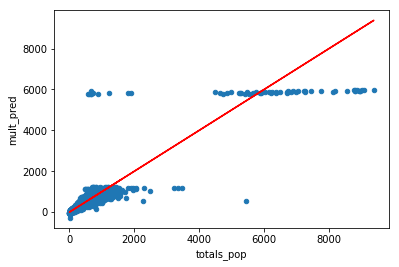

In [53]:
shooting_and_sales_per_pop['mult_pred']=full_model.predict()
shooting_and_sales_per_pop.plot('totals_pop', 'mult_pred', kind='scatter')
plt.plot(shooting_and_sales_per_pop.totals_pop, shooting_and_sales_per_pop.totals_pop, color='red')
plt.show()

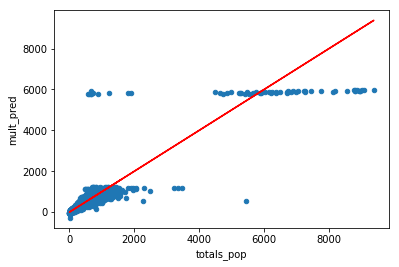

In [54]:
shooting_and_sales_per_pop['mult_pred']=full_model.predict()
shooting_and_sales_per_pop.plot('totals_pop', 'mult_pred', kind='scatter')
plt.plot(shooting_and_sales_per_pop.totals_pop, shooting_and_sales_per_pop.totals_pop, color='red')
plt.show()

In [55]:
df_year = shooting_and_sales_per_pop['year'].value_counts()   # for weekofyear variable
year_df = pd.DataFrame({'Year':df_year.index, 'Count':df_year.values})
lm_year = smf.ols(formula= "Year ~ Count", data=year_df).fit().summary()
lm_year

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Year   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 05 Dec 2018   Prob (F-statistic):                nan
Time:                        12:54:59   Log-Likelihood:                -8.8276
No. Observations:                   5   AIC:                             19.66
Df Residuals:                       4   BIC:                             19.26
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0054   1.89e-06   2849.640      0.000       0.005       0.005
Count          3.2925      0.001   2849.640      0.000       3.289       3.296
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.100
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.352
Skew:                           0.000   Prob(JB):                        0.839
Kurtosis:                       1.700   Cond. No.                     2.57e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
df_month = shooting_and_sales_per_pop['month'].value_counts()   # for weekofyear variable
month_df = pd.DataFrame({'Month':df_month.index, 'Count':df_month.values})
lm_month = smf.ols(formula= "Month ~ Count", data=month_df).fit().summary()
lm_month

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Month   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 05 Dec 2018   Prob (F-statistic):                nan
Time:                        12:55:14   Log-Likelihood:                -31.895
No. Observations:                  12   AIC:                             65.79
Df Residuals:                      11   BIC:                             66.27
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.996e-05    1.6e-05      6.245      0.000    6.47e-05       0.000
Count          0.0255      0.004      6.245      0.000       0.017       0.034
==============================================================================
Omnibus:                        2.375   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                0.740
Skew:                           0.000   Prob(JB):                        0.691
Kurtosis:                       1.783   Cond. No.                     2.45e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Machine Learning Model 